In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Load the dataset
zoo_data = pd.read_csv('Zoo.csv')

# Step 2: Preprocess the data
X = zoo_data.drop(['animal name', 'type'], axis=1)  # Features
y = zoo_data['type']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train the k-NN classifier with grid search algorithm tuning
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}  # Define the grid of hyperparameters

knn_classifier = KNeighborsClassifier()
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Evaluate the model with best parameters
best_knn_classifier = grid_search.best_estimator_
y_pred_best = best_knn_classifier.predict(X_test_scaled)
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Accuracy with Best Parameters:", accuracy_best)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred_best))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))


C:\Users\siris\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'n_neighbors': 5}
Best Cross-Validation Score: 0.95
Accuracy with Best Parameters: 0.9523809523809523
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.78      0.83      0.80        21
weighted avg       0.92      0.95      0.93        21

Confusion Matrix:
[[12  0  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  1]]


C:\Users\siris\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\siris\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\siris\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [2]:
print(zoo_data.columns)


Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')


Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB
None


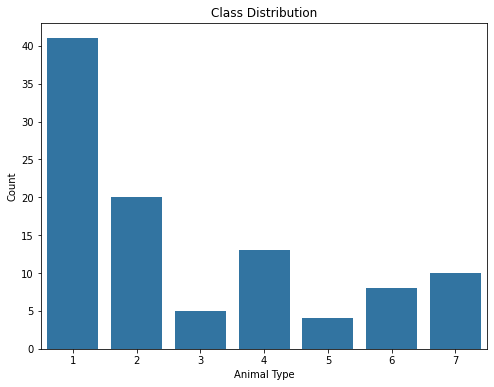

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the dataset
zoo_data = pd.read_csv('Zoo.csv')

# Step 2: Explore the data (EDA)
print("Data Information:")
print(zoo_data.info())

print("\nData Description:")
print(zoo_data.describe())

print("\nClass Distribution:")
print(zoo_data['type'].value_counts())

# Visualize Class Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=zoo_data)
plt.title('Class Distribution')
plt.xlabel('Animal Type')
plt.ylabel('Count')
plt.show()


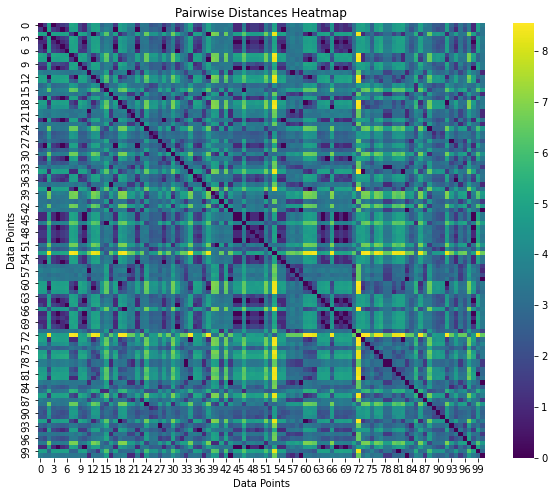

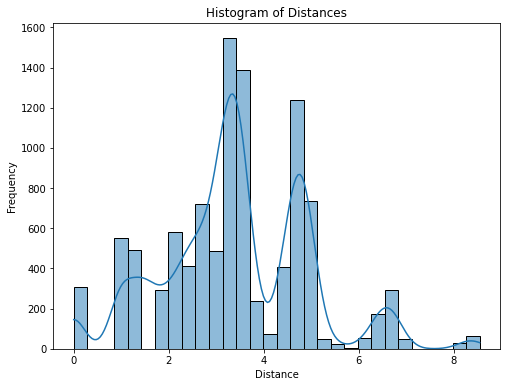

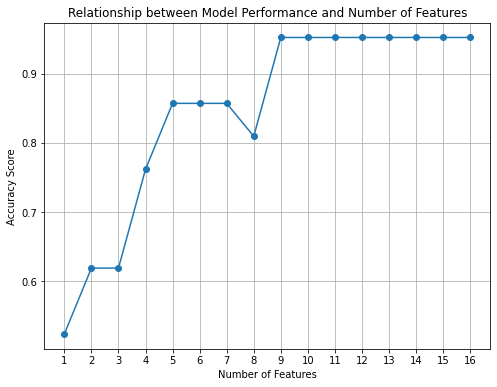

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Step 1: Load the dataset
zoo_data = pd.read_csv('Zoo.csv')

# Step 2: Distance Metric Selection: Pairwise Distances Heatmap
pairwise_distances = np.zeros((len(zoo_data), len(zoo_data)))
for i in range(len(zoo_data)):
    for j in range(len(zoo_data)):
        pairwise_distances[i, j] = np.linalg.norm(zoo_data.iloc[i, 1:-1] - zoo_data.iloc[j, 1:-1])

plt.figure(figsize=(10, 8))
sns.heatmap(pairwise_distances, cmap='viridis')
plt.title('Pairwise Distances Heatmap')
plt.xlabel('Data Points')
plt.ylabel('Data Points')
plt.show()

# Step 3: Neighborhood Analysis: Histogram of Distances
plt.figure(figsize=(8, 6))
sns.histplot(pairwise_distances.flatten(), bins=30, kde=True)
plt.title('Histogram of Distances')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()

# Step 4: Curse of Dimensionality: Relationship between Model Performance and Number of Features
num_features = range(1, len(zoo_data.columns) - 1)
accuracy_scores = []

for num_feature in num_features:
    X_subset = zoo_data.iloc[:, 1:-1].iloc[:, :num_feature]
    y = zoo_data['type']  # Target variable
    X_train_subset, X_test_subset, y_train, y_test = train_test_split(X_subset, y, test_size=0.2, random_state=42)
    scaler = MinMaxScaler()
    X_train_scaled_subset = scaler.fit_transform(X_train_subset)
    X_test_scaled_subset = scaler.transform(X_test_subset)
    knn_classifier_subset = KNeighborsClassifier(n_neighbors=5)
    knn_classifier_subset.fit(X_train_scaled_subset, y_train)
    y_pred_subset = knn_classifier_subset.predict(X_test_scaled_subset)
    accuracy_scores.append(accuracy_score(y_test, y_pred_subset))

# Plotting the relationship between model performance and number of features
plt.figure(figsize=(8, 6))
plt.plot(num_features, accuracy_scores, marker='o')
plt.title('Relationship between Model Performance and Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy Score')
plt.xticks(num_features)
plt.grid(True)
plt.show()


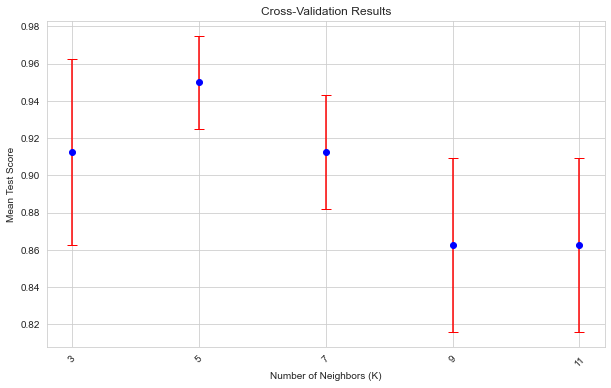

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extracting cross-validation results
cv_results = grid_search.cv_results_

# Extracting hyperparameters and corresponding scores
params = cv_results['param_n_neighbors']
mean_test_scores = cv_results['mean_test_score']
std_test_scores = cv_results['std_test_score']

# Visualizing cross-validation results
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
plt.errorbar(range(len(params)), mean_test_scores, yerr=std_test_scores, fmt='o', color='b', ecolor='r', capsize=5)
plt.xticks(range(len(params)), params, rotation=45)
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Test Score')
plt.title('Cross-Validation Results')
plt.grid(True)
plt.show()


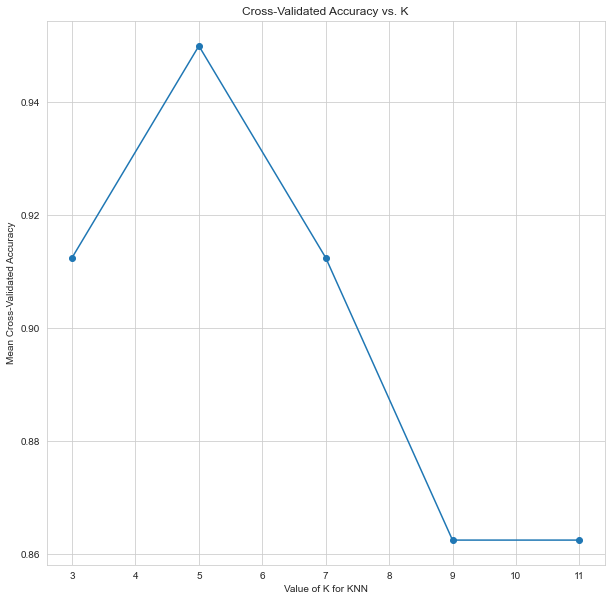

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Extracting k values and corresponding mean test scores from GridSearchCV results
k_range = grid_search.cv_results_['param_n_neighbors'].data
mean_test_scores = grid_search.cv_results_['mean_test_score']

# Converting k_range to integers (assuming k values are integers)
k_range = np.array(k_range, dtype=int)

# Plotting the cross-validated accuracy
plt.figure(figsize=(10, 10))
plt.plot(k_range, mean_test_scores, marker='o')
plt.xlabel('Value of K for KNN')
plt.ylabel('Mean Cross-Validated Accuracy')
plt.title('Cross-Validated Accuracy vs. K')
plt.grid(True)
plt.show()
